1 Загрузка обработанных данных

In [12]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Atestat-3/data/processed/ecommerce_churn_processed.csv', sep=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2 Разделение на train/test (80/20)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2)

print(f"Train: {X_train.shape} ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test:  {X_test.shape} ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"Churn в train: {y_train.mean():.2%}")
print(f"Churn в test:  {y_test.mean():.2%}")

Train: (4504, 20) (80%)
Test:  (1126, 20) (20%)
Churn в train: 16.74%
Churn в test:  17.23%


3 Тестирование 4 моделей:

> Оценка каждой модели по Precision/Recall



In [23]:
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[name] = {'Precision': precision, 'Recall': recall}

    print(f"{name}:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")

    if precision >= 0.70 and recall >= 0.65:
      print("Требования выполнены")
    else:
      print("Требования НЕ выполнены")

Random Forest:
  Precision: 0.959
  Recall:    0.840
Требования выполнены
Gradient Boosting:
  Precision: 0.803
  Recall:    0.608
Требования НЕ выполнены
XGBoost:
  Precision: 0.962
  Recall:    0.907
Требования выполнены
Logistic Regression:
  Precision: 0.790
  Recall:    0.428
Требования НЕ выполнены


4 Сравнение моделей

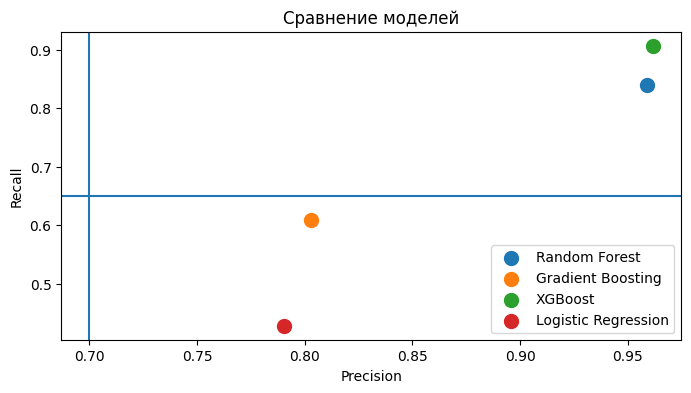

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
for i, (name, scores) in enumerate(results.items()):
    plt.scatter(scores['Precision'], scores['Recall'], s=100, label=name)

plt.axvline(x=0.70)
plt.axhline(y=0.65)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Сравнение моделей')
plt.legend()
plt.show()

5 Лучшая модель по Recall: XGBoost


XGBoost:
Precision: 0.962 (≥0.70)
Recall:    0.907 (≥0.65)


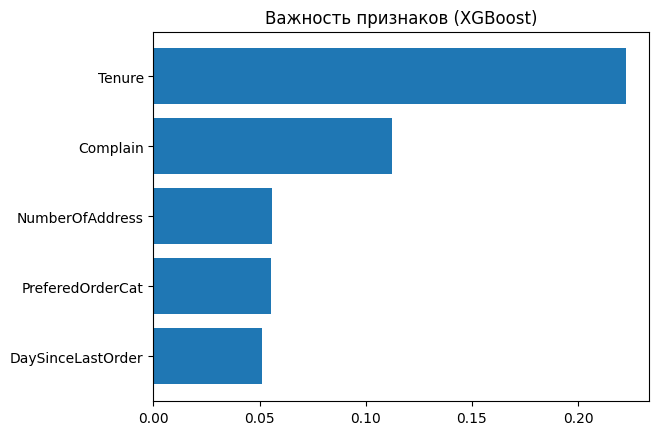

In [16]:
best_model_name = 'XGBoost'
best_precision = results[best_model_name]['Precision']
best_recall = results[best_model_name]['Recall']

print(f"\n{best_model_name}:")
print(f"Precision: {best_precision:.3f} (≥0.70)")
print(f"Recall:    {best_recall:.3f} (≥0.65)")

best_model = models[best_model_name]
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.barh(feat_imp['feature'].head(5)[::-1], feat_imp['importance'].head(5)[::-1])
plt.title('Важность признаков (XGBoost)')
plt.show()